In [2]:
import sys
import json
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
import numpy as np
import random

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams.update({
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "white",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white",
    "font.size": 25})


definitions: 

average channel capacity = 2400000

average edges capacity = 1200000 sat

average payment amount = 60000 sat

then:

a = 20

cap = 40

T = 5000 transaction per day

r = 20000/(3263) ^ 2 = 2.2 * 10 ^ -3

In [3]:
#DEFININTIONS
avgPaymentAmount = 60000
r = 2.2*1e-3

In [4]:
def load_json(file_path):
    try:
        f = open(file_path, 'r', encoding="utf8")
    except:
        print("Could not open file: " + file_path)
        sys.exit(-1)

    try:
        json_data =json.load(f)
    except:
        print("Could not parse JSON!")
        sys.exit(-1)

    for item in json_data['edges']:
        if item['capacity']:
            item['capacity'] = int(item['capacity'])

    return json_data

def load_graph(json_data):
    G = json_graph.node_link_graph(json_data, False, False, {'name':'pub_key', 'source':'node1_pub', 'target':'node2_pub', 'key':'channel_id', 'link':'edges'})
    return G

In [5]:
json_data = load_json("lngraph_2019_02_17__11_00.json")
G = load_graph(json_data)

num_edges = nx.number_of_edges(G)
num_non_edges = nx.non_edges(G)
num_nodes = nx.number_of_nodes(G)

print("Number of edges: {}".format(num_edges))
print("Number of nodes: {}".format(num_nodes))

Number of edges: 25576
Number of nodes: 3263


In [6]:
EBC = nx.edge_betweenness_centrality(G, k=None, normalized=False, weight=None)
EBC_sorted = dict(sorted(EBC.items(), key=lambda item: item[1], reverse=True))

total avg: 1833.2028158188937
total std: 7086.902826909367
total median: 27.069959593641688
highest 0.14 EBCs lifeTime avg: 172.31808877713573
highest 0.14 EBCs lifeTime std: 587.2500551670266
highest 0.14 EBCs lifeTime median: 1.622794981905848


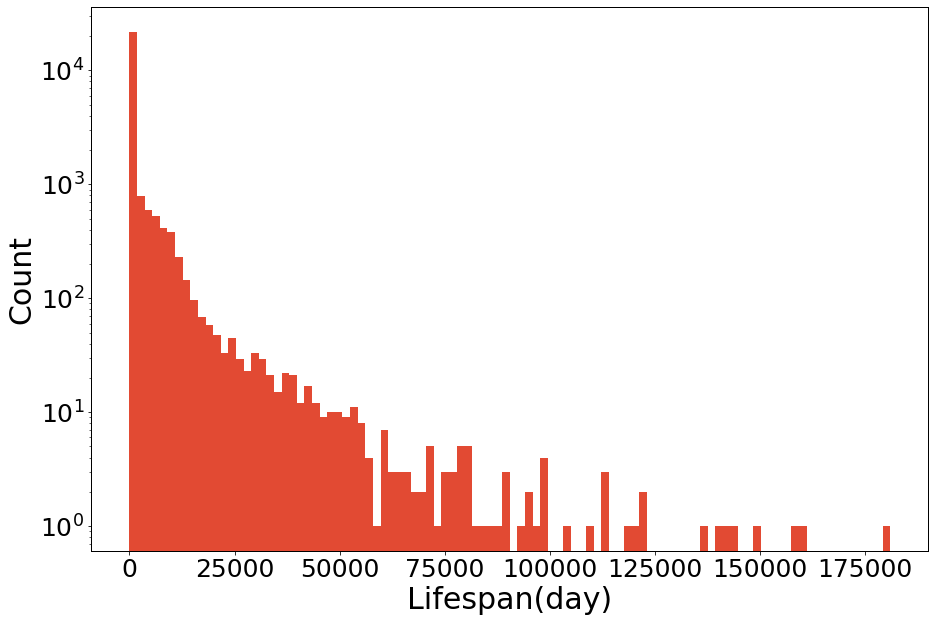

In [11]:
# 0.14 highest
sampleSize = 3580
i = 0
lifeTime_high = []
for ebc in EBC_sorted.items():
    lifeTime_high.append(((G[ebc[0][0]][ebc[0][1]]['capacity'] / avgPaymentAmount) ** 2) / ((ebc[1] * 2) * 4 * r))
    
# lifeTime_high.sort()
print("total avg:", np.mean(lifeTime_high))
print("total std:", np.std(lifeTime_high))
print("total median:",np.median(lifeTime_high))

print("highest 0.14 EBCs lifeTime avg:", np.mean(lifeTime_high[:sampleSize]))
print("highest 0.14 EBCs lifeTime std:", np.std(lifeTime_high[:sampleSize]))
print("highest 0.14 EBCs lifeTime median:",np.median(lifeTime_high[:sampleSize]))

plt.hist(lifeTime_high, bins=100)
plt.yscale('log')
plt.xlabel("Lifespan(day)")
plt.ylabel("Count")
plt.show()

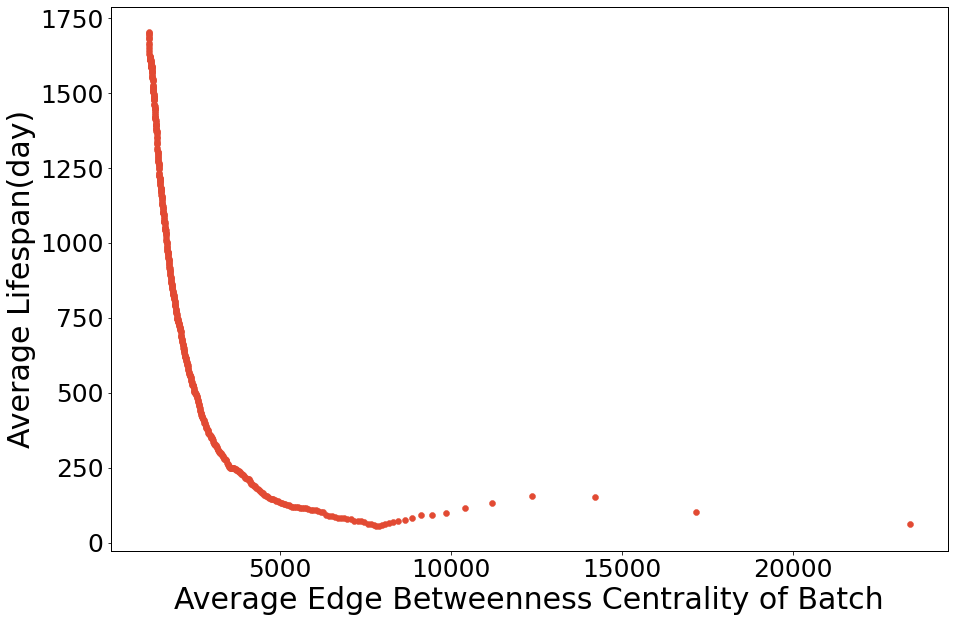

In [10]:
EBC_sorted = dict(sorted(EBC.items(), key=lambda item: item[1], reverse=True))
sampleSize = 25000
lifeTime_high = []
EBC_high_list = []
# capacity_high_list = []
# capacity_high_list_power = []
for ebc in EBC_sorted.items():
    EBC_high_list.append(ebc[1] * 2)
    lifeTime_high.append(((G[ebc[0][0]][ebc[0][1]]['capacity'] / avgPaymentAmount)** 2) / ((ebc[1] * 2) * 4 * r))
    # capacity_high_list.append(G[ebc[0][0]][ebc[0][1]]['capacity'] / avgPaymentAmount)
    # capacity_high_list_power.append((G[ebc[0][0]][ebc[0][1]]['capacity'] / avgPaymentAmount) ** 2)

avg_lifeTime_high = []
avg_ebc_high = []
# avg_cap_high = []
# avg_cap_high_power = []
# median_lifeTime_high = []

avg_lifeTime_movingWindow = []
avg_ebc_movingWindow = []

for sample in range(50, sampleSize, 50):
    avg_lifeTime_high.append(np.mean(lifeTime_high[0:sample]))
    avg_ebc_high.append(np.mean(EBC_high_list[0:sample]))
    # avg_cap_high.append(np.mean(capacity_high_list[:sample]))
    # avg_cap_high_power.append(np.mean(capacity_high_list_power[:sample]))
    # median_lifeTime_high.append(np.median(lifeTime_high[0:sample]))

for sample in range(500, sampleSize, 50):
    avg_lifeTime_movingWindow.append(np.mean(lifeTime_high[sample - 500:sample]))
    avg_ebc_movingWindow.append(np.mean(EBC_high_list[sample - 500:sample]))




plt.scatter(avg_ebc_high, avg_lifeTime_high)
plt.ylabel("Average Lifespan(day)")
plt.xlabel("Average Edge Betweenness Centrality of Batch")
plt.show()


# plt.scatter(avg_ebc_movingWindow, avg_lifeTime_movingWindow)
# plt.ylabel("Average Lifespan(day)")
# plt.xlabel("Average Edge Betweenness Centrality of Batch")
# plt.show()

# plt.scatter(avg_ebc_high, median_lifeTime_high)
# plt.show()
# plt.scatter(avg_cap_high, avg_lifeTime_high)
# plt.show()

# plt.scatter(avg_ebc_high, avg_cap_high)
# plt.show()

# plt.scatter(avg_ebc_high, avg_cap_high_power)
# plt.show()

In [256]:
Gp = nx.Graph()
Gp.add_edge(0,1)
r = nx.edge_betweenness_centrality(Gp)
print(r)

{(0, 1): 1.0}
